# Step1 - Import datasets and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')

# step2 - Exporing the Dataset

In [3]:
df.shape

(768, 10)

In [4]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
df.tail()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
#analyze the infromation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [7]:
#Describe the data
df.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600


In [8]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

# Step3- rename the irrelevant columns

In [9]:
# Renaming Diastolic blood pressure as DBP
df = df.rename(columns={'diastolic_bp':'BloodPressure'})
# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'diab_pred':'DPF'})
# Renaming numof pregenants as pregnancies
df = df.rename(columns={'num_preg':'Pregnecies'})
# Renaming  plasma glucose concentration as glucose
df = df.rename(columns={'glucose_conc':'Glucose'})
df = df.rename(columns={'insulin':'Insulin'})
df = df.rename(columns={'age':'Age'})
df = df.rename(columns={'skin':'Skin'})
df = df.rename(columns={'bmi':'BMI'})
df = df.rename(columns={'thickness':'SkinThickness'})


In [10]:
df.head()


,Pregnecies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


# Step4 - Handling the missing data

data cleaning - remove null values and outliers

In [11]:
# Also you use the “info()” function to have an idea about null columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnecies     768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Skin           768 non-null    float64
 9   diabetes       768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [12]:
df.diabetes.unique()

array([ True, False])

In [13]:
df.columns

Index(['Pregnecies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Skin', 'diabetes'],
      dtype='object')

In [14]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','Skin','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','Skin','Insulin','BMI']].replace(0,np.NaN)

In [15]:
df_copy.head()

,Pregnecies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Skin,diabetes
0,6,148.0,72.0,35,NaN,33.6,0.627,50,1.3790,True
1,1,85.0,66.0,29,NaN,26.6,0.351,31,1.1426,False
2,8,183.0,64.0,0,NaN,23.3,0.672,32,NaN,True
3,1,89.0,66.0,23,94.0,28.1,0.167,21,0.9062,False
4,0,137.0,40.0,35,168.0,43.1,2.288,33,1.3790,True


In [16]:
df_copy.isnull().sum()

Pregnecies         0
Glucose            5
BloodPressure     35
SkinThickness      0
Insulin          374
BMI               11
DPF                0
Age                0
Skin             227
diabetes           0
dtype: int64

In [17]:
# we can replace the mean value of the relevant column
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['Skin'].fillna(df_copy['Skin'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)


In [18]:
#check the null values count after replacing as mean
df_copy.isnull().sum()

Pregnecies       0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Skin             0
diabetes         0
dtype: int64

In [19]:
df_copy = df

# Step5- Formating the data

In [20]:
df.diabetes.unique()

array([ True, False])

In [21]:
df

,Pregnecies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


In [22]:
df["diabetes"].value_counts()

False    500
True     268
Name: diabetes, dtype: int64

In [23]:
# cleanup_nums = {"diabetes": {"True": 1, "False": 0}}                   

In [24]:
# df = df.replace(cleanup_nums)
# df.head()

In [25]:
# change boolean to numeric format
df['diabetes'] = df['diabetes'].astype('int')

In [26]:
df.tail()

,Pregnecies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,0
764,2,122,70,27,0,36.8,0.340,27,1.0638,0
765,5,121,72,23,112,26.2,0.245,30,0.9062,0
766,1,126,60,0,0,30.1,0.349,47,0.0000,1
767,1,93,70,31,0,30.4,0.315,23,1.2214,0


In [27]:
# Save to a csv,
df.to_csv('cleaned_dset2.csv',index=False)

# Step6 - Visualiztion

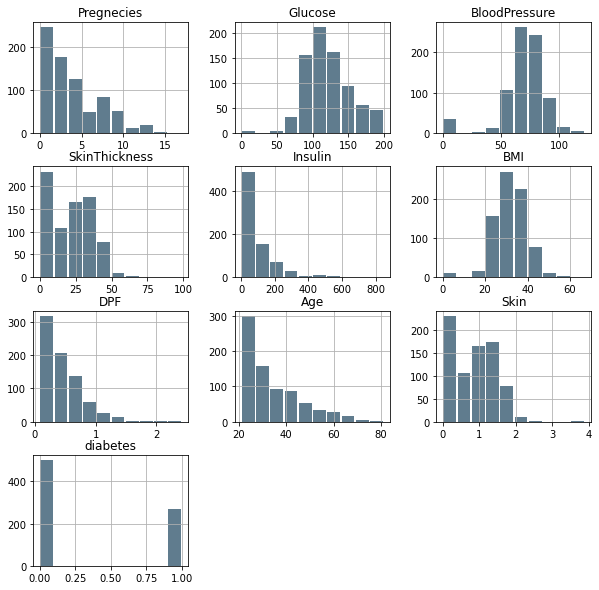

In [28]:
#histogram
df.hist(bins=10,figsize=(10,10) ,rwidth=0.9,color='#607c8e')
plt.show()

In [29]:
df.corr()

,Pregnecies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Skin,diabetes
Pregnecies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
DPF,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
Skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


<AxesSubplot:>

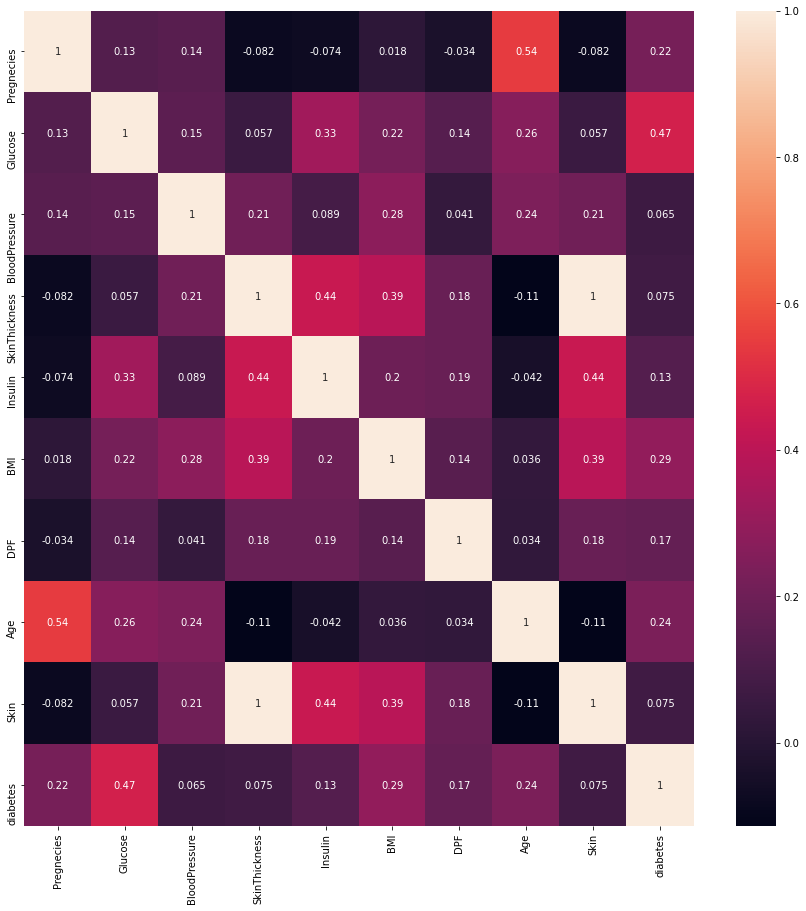

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)


<AxesSubplot:xlabel='diabetes', ylabel='count'>

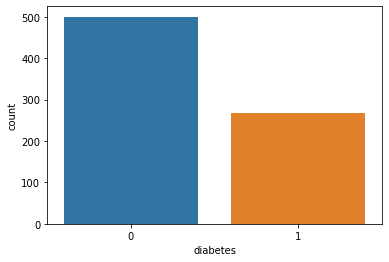

In [31]:
#find total no of diabates patients, 0 as no diabetes and 1 as diabetes 
sns.countplot(x=df['diabetes'])

<AxesSubplot:>

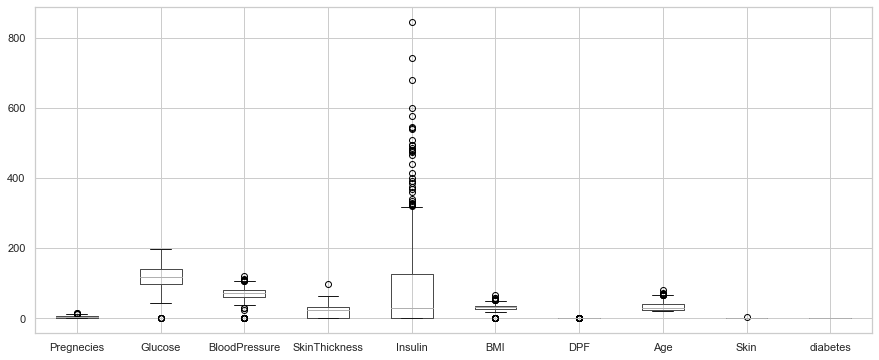

In [32]:
#box plot for outlier visualization for all 
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

In [33]:
df.columns

Index(['Pregnecies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DPF', 'Age', 'Skin', 'diabetes'],
      dtype='object')

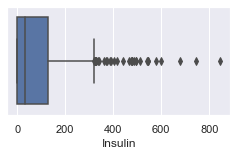

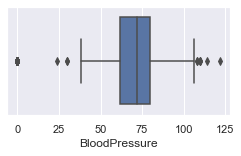

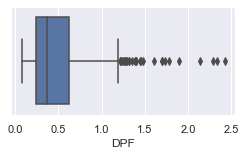

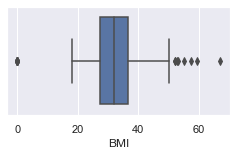

In [34]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DPF'])
plt.show()
sns.boxplot(x=df['BMI'])
plt.show()

In [35]:
#remove outliers for columns

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)
# print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 Pregnecies        1.00000
Glucose          99.00000
BloodPressure    62.00000
SkinThickness     0.00000
Insulin           0.00000
BMI              27.30000
DPF               0.24375
Age              24.00000
Skin              0.00000
diabetes          0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnecies         6.00000
Glucose          140.25000
BloodPressure     80.00000
SkinThickness     32.00000
Insulin          127.25000
BMI               36.60000
DPF                0.62625
Age               41.00000
Skin               1.26080
diabetes           1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnecies         5.0000
Glucose           41.2500
BloodPressure     18.0000
SkinThickness     32.0000
Insulin          127.2500
BMI                9.3000
DPF                0.3825
Age               17.0000
Skin               1.2608
diabetes           1.0000
dtype: float64


In [36]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((768, 10), (639, 10))

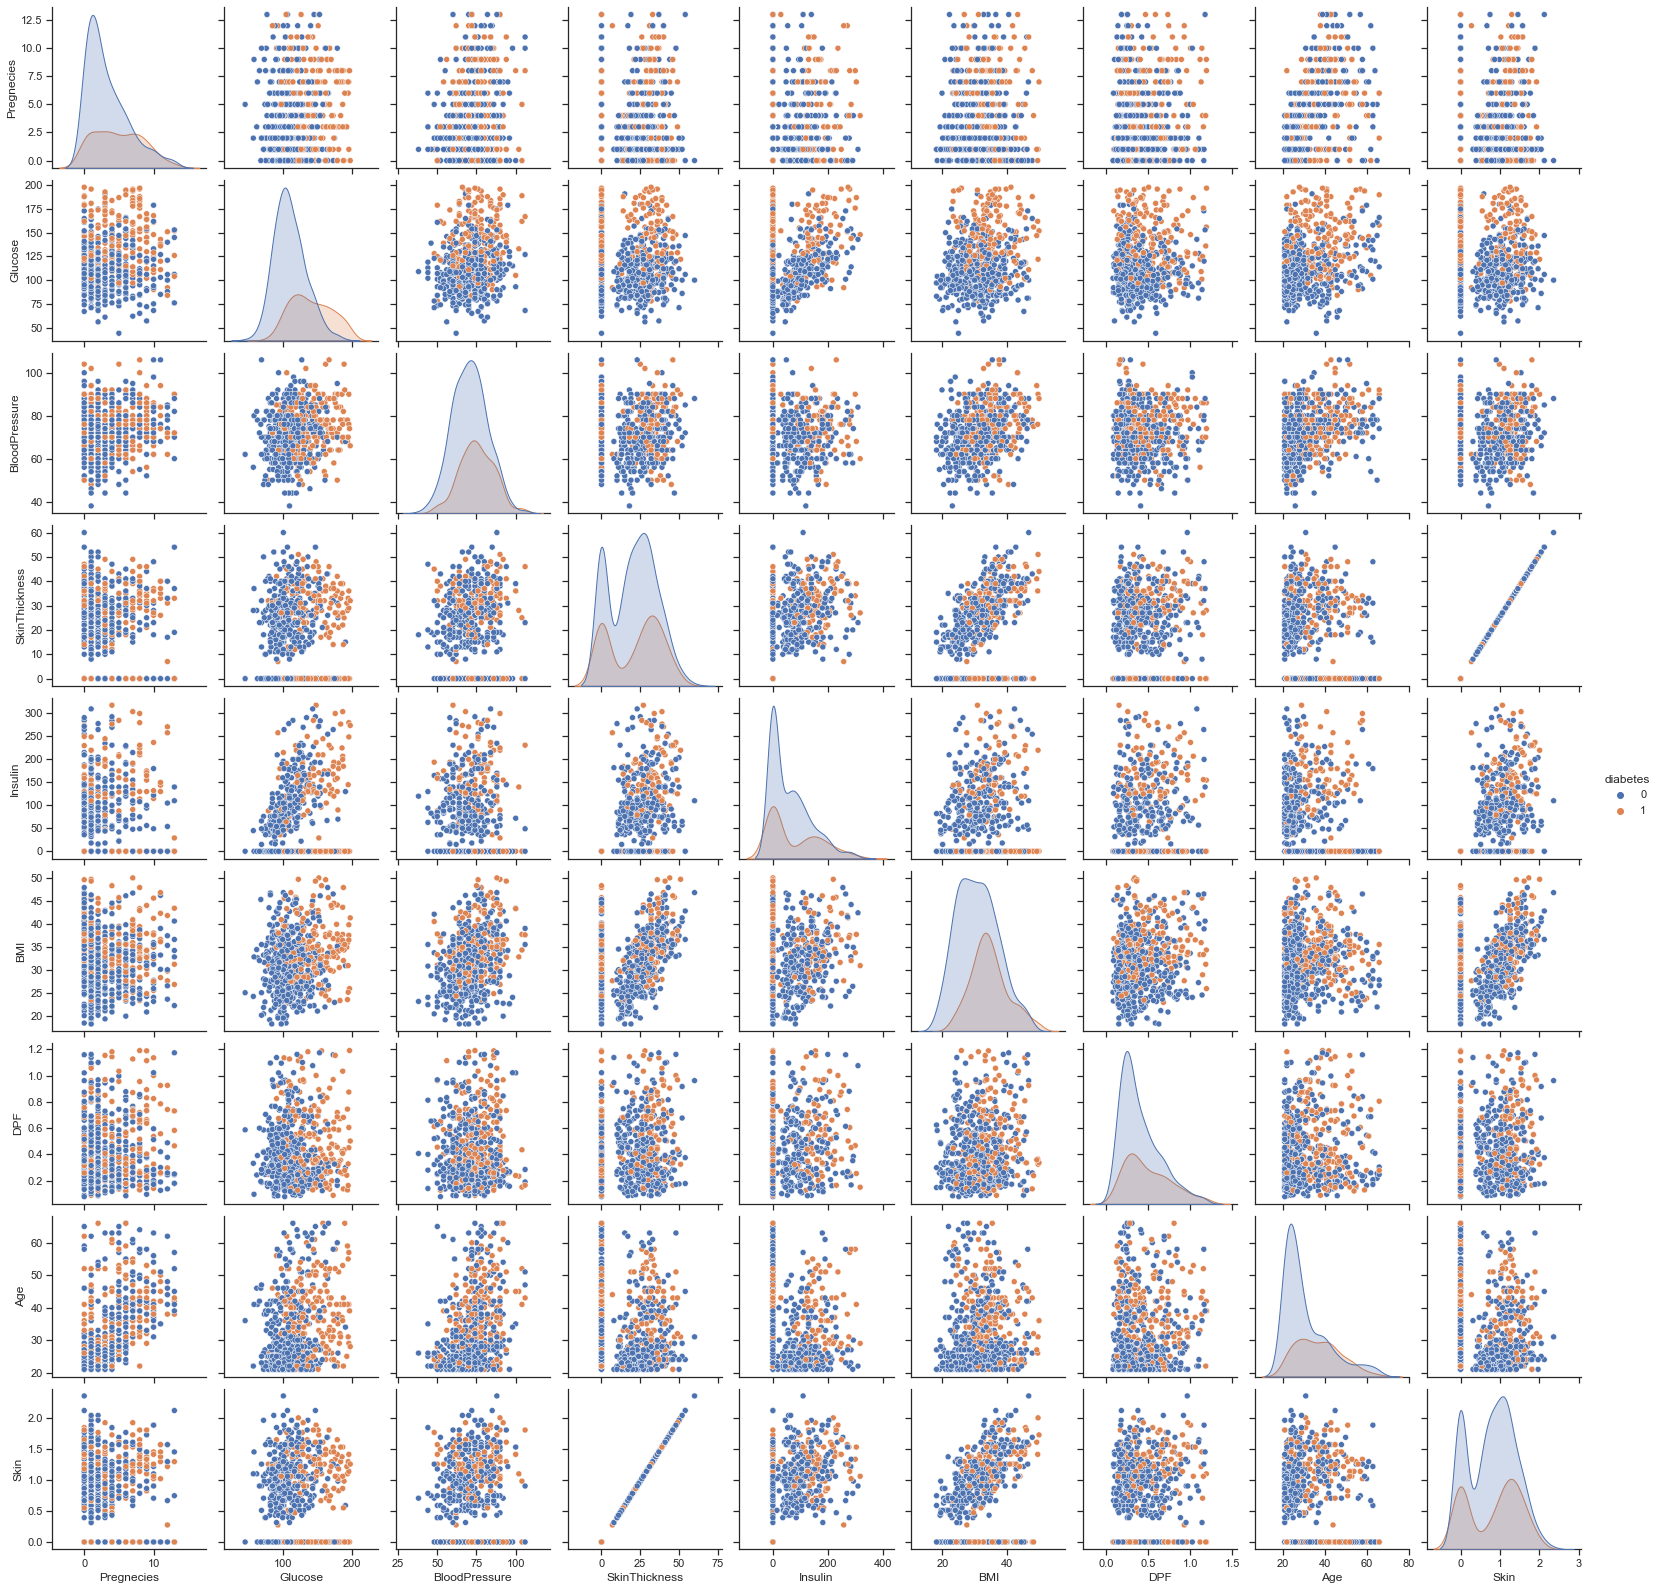

In [37]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="diabetes")
plt.show()

In [38]:
#lets extract features and targets
X=df_out.drop(columns=['diabetes'])
y=df_out['diabetes']

In [39]:
#Splitting train data and test data as 70:30 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3)

In [40]:
test_X

,Pregnecies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Skin
561,0,198,66,32,274,41.3,0.502,28,1.2608
164,0,131,88,0,0,31.6,0.743,32,0.0000
668,6,98,58,33,190,34.0,0.430,43,1.3002
477,7,114,76,17,110,23.8,0.466,31,0.6698
67,2,109,92,0,0,42.7,0.845,54,0.0000
...,...,...,...,...,...,...,...,...,...
73,4,129,86,20,270,35.1,0.231,23,0.7880
704,4,110,76,20,100,28.4,0.118,27,0.7880
345,8,126,88,36,108,38.5,0.349,49,1.4184
121,6,111,64,39,0,34.2,0.260,24,1.5366


In [41]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((447, 9), (192, 9), (447,), (192,))

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [43]:
#build model

#Support Vector Machine
from sklearn.svm import SVC
acc =[]

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

print("\nAccuracy {0} ".format(ac))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()



Accuracy 0.8177083333333334 
TP:  [ 7 12  3  5  8  6 11  7  8  8]
TN:  [27 28 29 26 27 25 25 24 27 27]
FN:  [ 8  3 12 10  7  9  4  8  7  7]
FP:  [3 2 1 4 3 5 5 5 2 2]


In [44]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

print("\nAccuracy {0} ".format(ac))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8125 
TP:  [ 8  6  6  6  7  6 12  9  8  5]
TN:  [22 26 23 24 23 22 25 21 24 24]
FN:  [ 7  9  9  9  8  9  3  6  7 10]
FP:  [8 4 7 6 7 8 5 8 5 5]


In [45]:
# from sklearn.metrics import confusion_matrix

# cm=confusion_matrix(test_y,predicted)
# cm

In [46]:
# plt.clf()
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
# classNames = ['Negative','Positive']
# plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# tick_marks = np.arange(len(classNames))
# plt.xticks(tick_marks, classNames, rotation=45)
# plt.yticks(tick_marks, classNames)
# s = [['TN','FP'], ['FN', 'TP']]
# for i in range(2):
#     for j in range(2):
#         plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
# plt.show()

In [47]:
# from sklearn.neighbors import KNeighborsClassifier

# model=KNeighborsClassifier(n_neighbors=5)

# model.fit(train_X,train_y)
# predicted=model.predict(test_X)
# predicted
# errors =abs(predicted - test_y)

# A = 1-round(np.mean(errors),2)
# print('Accuracy:',A)

# Selected model

In [48]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=20)
classifier.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

print("\nAccuracy {0}".format(ac))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.8125
TP:  [ 8  6  6  6  7  6 12  9  8  5]
TN:  [22 26 23 24 23 22 25 21 24 24]
FN:  [ 7  9  9  9  8  9  3  6  7 10]
FP:  [8 4 7 6 7 8 5 8 5 5]


In [49]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

print("\nAccuracy {0}".format(ac))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7760416666666666
TP:  [ 8 13  5  7  9  5 11 11 10  8]
TN:  [26 22 26 27 27 25 23 25 25 22]
FN:  [ 7  2 10  8  6 10  4  4  5  7]
FP:  [4 8 4 3 3 5 7 4 4 7]


In [50]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

print("\nAccuracy {0}".format(ac))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.7864583333333334
TP:  [ 7 11  5  6  7  8 11  9 10 11]
TN:  [26 24 25 25 26 25 23 24 24 23]
FN:  [ 8  4 10  9  8  7  4  6  5  4]
FP:  [4 6 5 5 4 5 7 5 5 6]


In [51]:
# #lets plot the bar graph

# ax=plt.figure(figsize=(9,4))
# plt.bar(['SVM','KNN','Random Forest','Naivye Bayes','Gradient Boosting'],acc,label='Accuracy')
# plt.ylabel('Accuracy Score')
# plt.xlabel('Algortihms')
# plt.show()


In [54]:
import pickle

In [55]:
# Creating a pickle file for the classifier
filename = 'di-prediction-rfc-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))